#### Завдання
### Напишіть код для визначення границь та кутів у зображенні за допомогою фільтра **Собеля**.
### Використовуючи метод густини **градієнта HOG**, напишіть код для витягування ознак із зображення.
### Завантажте датасет **CIFAR-10** та використайте **HOG** для витягування ознак зображень. Застосуйте будь-який класифікатор (наприклад **SVM**) для класифікації зображень та обчисліть такі метрики точності:
 * accuracy;
 * precision;
 * recall;
 * F1-score.
### Використайте **метод SIFT**  для витягування ознак із зображень та порівняйте його з **методом HOG** за допомогою метрик точності.

In [32]:
# Required libraries.
import cv2
from skimage.feature import hog
from skimage import data
from skimage import exposure

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.datasets import cifar10

# **<font color='blue'>Implementing The Sobel Edge Detection</font>**

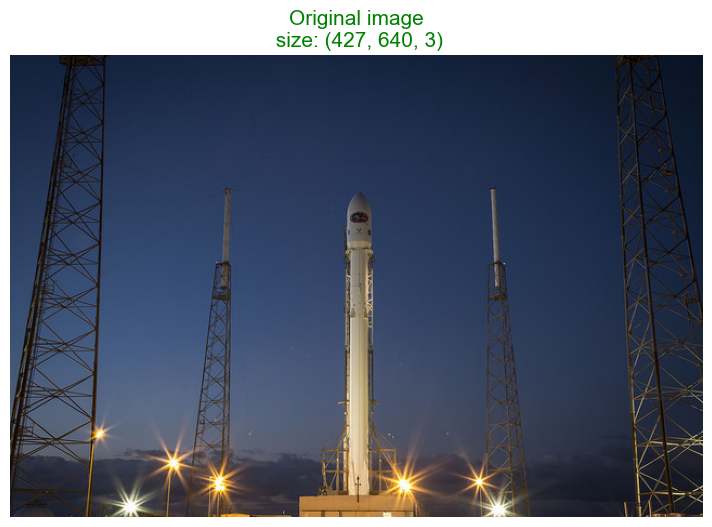

In [28]:
# Download an image.
origin_image = data.rocket()

# Visualisation.
plt.figure(figsize=(10, 6))
plt.title(f'Original image\n size: {origin_image.shape}', fontsize=15, color='g')
plt.axis('off')
plt.imshow(origin_image)
plt.show()

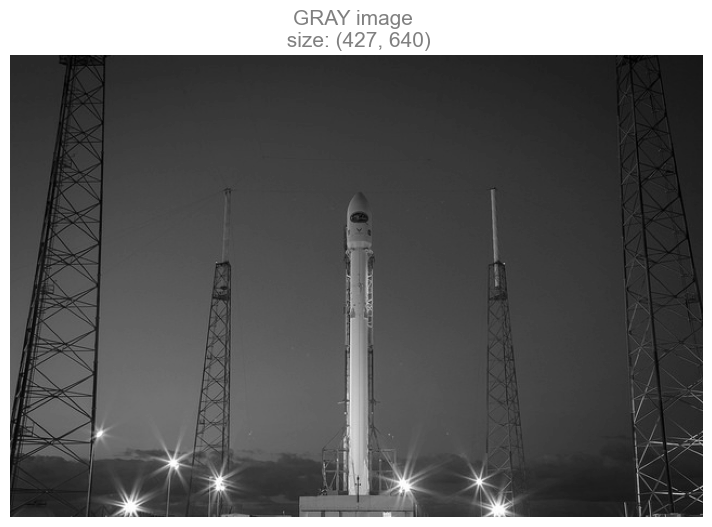

In [29]:
# Converting the origin image to GRAY.
gray_img = cv2.cvtColor(origin_image, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(10, 6))
plt.title(f'GRAY image \n size: {gray_img.shape}', fontsize=15, color='gray')
plt.axis('off')
plt.imshow(gray_img, cmap='gray')
plt.show()

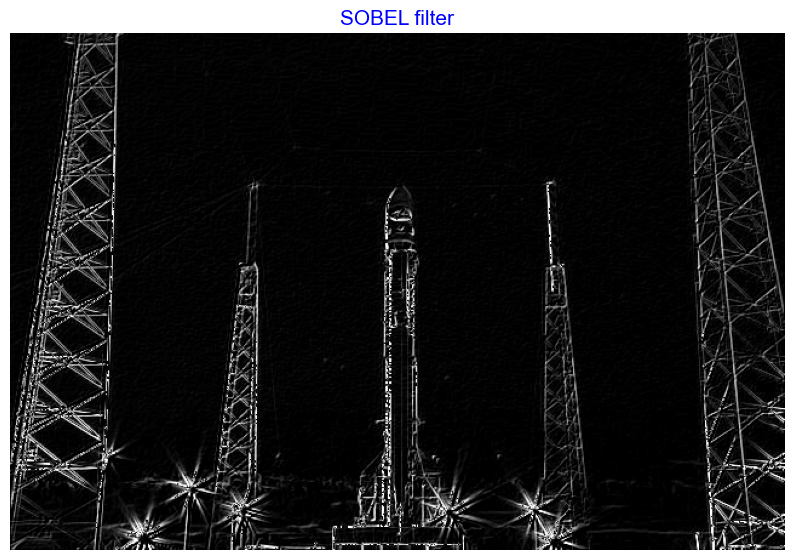

In [30]:
# Making matrix for the Sobel filter.
kernel_X = np.array([[-1,0,1], [-2,0,2], [-1,0,1]])
kernel_y = np.array([[-1,-2,-1], [0,0,0], [1,2,1]])

'''Note:
kernel – the 2d matrix we want the image to convolve with.
This function will simply convolute the 2d matrix with the image
at pixel level and produce an output image. '''


# Splitting into X, y edges for applying the Sobel filter
edges_X = cv2.filter2D(gray_img, -1, kernel_X)
edges_y = cv2.filter2D(gray_img, -1, kernel_y)

# Combining edges.
Sobel_edges = edges_X + edges_y

# Creating a figure for a subplot.
fig = plt.figure(figsize=(10, 8))
plt.title('SOBEL filter', fontsize=15, color='blue')
plt.axis('off')

# Display the Sobel filter.
plt.imshow(Sobel_edges, cmap='gray')
plt.show()

# **<font color='blue'>Histogram of Oriented Gradients (HOG)**</font>

In [44]:
# Calculate the HOG descriptor.
fd, hog_image = hog(origin_image, orientations=8,
                    pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1),
                    visualize=True, channel_axis=-1)

# Rescale histogram for better visualisation.
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

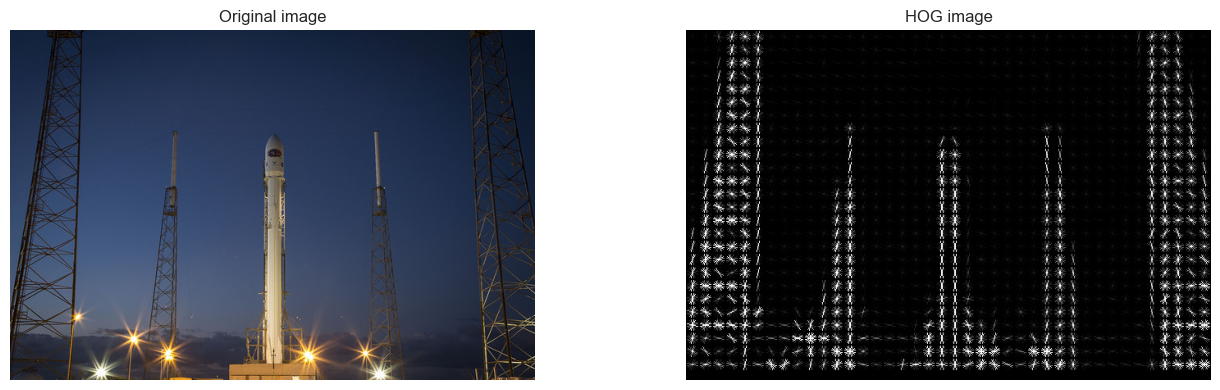

In [45]:
# Displaying the original image and the HOG descriptor.

# Creating a figure for a subplot.
fig = plt.figure(figsize=(16, 10))

# Subplot and Title for the SOBEL filter.
ax1 = fig.add_subplot(221)  # top left side.
ax1.title.set_text('Original image')

# Subplot and Title for the CANNY filter
ax2 = fig.add_subplot(222)  # top right side.
ax2.title.set_text('HOG image')


# Display the subplot.
ax1.imshow(origin_image)
ax2.imshow(hog_image_rescaled, cmap='gray')
ax1.axis('off')
ax2.axis('off')
plt.show()

# **<font color='blue'>CIFAR-10 dataset**</font>

In [ ]:
# Loading a dataset CIFAR-10.
image = tf.keras.datasets.cifar10.load_data()

# **<font color='blue'>Scale-Invariant Feature Transform (SIFT)**</font>

# **<font color='blue'>SIFT vs HOG**</font>